<a href="https://colab.research.google.com/github/mbaguesgalvez/marinabagues.github.io/blob/main/CMPS%203160-Coffee_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coffee Quality and Sensory Attributes
By Marina Bagues Galvez

CMPS 3160

Project Website:

Github Repository:

# Project Overview
This project explores how the sensory attributes of coffee (like aroma, acidity, body, or flavor) influence its quality score.

By using data from the Coffee Quality Institute (CQI), we can see if certain characteristics (such as acidity or sweetness) are better indicators of a high-quality coffee. This project will allow comparision between two types of coffee: **Arabica** and **Robusta**, to check if they share similar quality patterns.

The final goal is to understand what makes a coffee “good” and see whether different species are valued differently based on their sensory profile.


# Background & Motivation for this Project
Coffee is one of the most popular drinks in the world, and its quality can change a lot depending on the type of bean, where it’s grown, and how it’s processed.
The Coffee Quality Institute (CQI) collects data from trained coffee tasters who rate each sample based on different sensory attributes like aroma, acidity, and body. All these scores are then combined into one final number called Total Cup Points, which represents the overall quality of the coffee.

Since I drink coffee almost every day, I thought it would be fun to actually study it and see what makes one cup better than another. It’s something that feels part of my daily routine, but I had never really thought about what defines a “good” coffee from a professional perspective.


# Research Questions



1.   For Arabica coffee, which sensory attributes (like aroma, flavor, acidity, or body) have the strongest relationship with the final quality score, known as Total Cup Points?
2.   When comparing Arabica and Robusta coffees, do the same sensory factors explain quality in both types, or are there clear differences in which attributes matter the most?



# MILESTONE 1: Initial ETL (Extract, Tidy, Load)

# Data Sources
For this project, I used two public datasets that come from the Coffee Quality Institute (CQI).

They were collected from the official CQI database and later cleaned by users on GitHub and Kaggle.
Both datasets include information from trained coffee tasters who evalaute the sensory quality of different coffee samples. This, helps explore how the tasting attributes are connected to the overall quality of the coffee, and see if these patterns change between Arabica and Robusta beans.


*   **Arabica dataset:** This file includes 1,311 Arabica coffee samples with variables such as country of origin, processing method, and sensory scores (aroma, flavor, aftertaste, acidity, body, balance, etc.), plus the final Total Cup Points that represent the coffee’s overall quality. It comes from the public GitHub repository created by jldbc
, which is based on official CQI data.
"C:\Users\marin\OneDrive\Documentos\TULANE 2025-2026\FALL SEMESTER\CMPS 3160-01 Intro to Data Science\final pjt\arabica_data_cleaned.csv" (https://github.com/jldbc/coffee-quality-database/blob/master/data/arabica_data_cleaned.csv)

*  **Robusta dataset**: This dataset comes from the same CQI source but focuses on Robusta coffee beans. It has the same structure as the Arabica file, which makes it easy to compare the two species directly in the analysis.
https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi

# Imports and Loading the Data



In [20]:
!git clone https://github.com/mbaguesgalvez/marinabagues.github.io
%cd marinabagues.github.io

Cloning into 'marinabagues.github.io'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 337.39 KiB | 8.03 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/marinabagues.github.io/marinabagues.github.io


In [13]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Load both datasets

df_arabica = pd.read_csv('arabica_data_cleaned.csv', sep=',' )
df_robusta = pd.read_csv('robusta_data_cleaned.csv', sep= ',')

# Add coffee type identifiers
df_arabica['species'] = 'Arabica'
df_robusta['species'] = 'Robusta'

# Combine both datasets into a single DataFrame
df = pd.concat([df_arabica, df_robusta], ignore_index=True)

# Add a unique ID for each sample
df['sample_id'] = df.index

# Basic dataset info
print(f'Total Number of Arabica Samples: {len(df_arabica)}')
print(f'Total Number of Robusta Samples: {len(df_robusta)}')
print(f'Total Number of Samples: {len(df)}')

df.head()

Total Number of Arabica Samples: 1311
Total Number of Robusta Samples: 28
Total Number of Samples: 1339


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,altitude_low_meters,altitude_high_meters,altitude_mean_meters,species,Fragrance...Aroma,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,sample_id
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1950.0,2200.0,2075.0,Arabica,NaN,NaN,NaN,NaN,NaN,0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1950.0,2200.0,2075.0,Arabica,NaN,NaN,NaN,NaN,NaN,1
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,1600.0,1800.0,1700.0,Arabica,NaN,NaN,NaN,NaN,NaN,2
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,1800.0,2200.0,2000.0,Arabica,NaN,NaN,NaN,NaN,NaN,3
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1950.0,2200.0,2075.0,Arabica,NaN,NaN,NaN,NaN,NaN,4


Dataset Overview

The combined dataset contains information about coffee samples evaluated by professional tasters.
Each record includes the country of origin, processing method, and sensory attributes such as aroma, flavor, aftertaste, acidity, body, balance, and the final Total Cup Points, which represent the coffee’s overall quality score.

Here’s a summary of the key variables:

Country.of.Origin – Nominal: where the coffee was produced

Processing.Method – Nominal: washed, natural, honey, etc.

Aroma – Interval: aroma intensity rated 0–10

Flavor – Interval: taste perception, 0–10

Aftertaste – Interval: taste persistence, 0–10

Acidity – Interval: perceived brightness/acidity, 0–10

Body – Interval: mouthfeel or weight, 0–10

Balance – Interval: overall harmony of flavors, 0–10

Uniformity, Clean.Cup, Sweetness – Binary-like scales (mostly 10 or 0 if defect detected)

Total.Cup.Points – Ratio: final quality score (0–100)

species – Nominal: identifies whether the sample is Arabica or Robusta

sample_id – Nominal: unique identifier

# Basic Statistics

In [14]:
# Basic descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1339.0,642.586258,385.707857,1.00,307.50,642.00,976.50,1312.00
Number.of.Bags,1339.0,154.182972,129.987162,0.00,14.00,175.00,275.00,1062.00
Aroma,1311.0,7.563806,0.378666,0.00,7.42,7.58,7.75,8.75
Flavor,1339.0,7.520426,0.398442,0.00,7.33,7.58,7.75,8.83
Aftertaste,1339.0,7.401083,0.404463,0.00,7.25,7.42,7.58,8.67
Acidity,1311.0,7.533112,0.381599,0.00,7.33,7.50,7.75,8.75
Body,1311.0,7.517727,0.359213,0.00,7.33,7.50,7.67,8.58
Balance,1339.0,7.518013,0.408943,0.00,7.33,7.50,7.75,8.75
Uniformity,1311.0,9.833394,0.559343,0.00,10.00,10.00,10.00,10.00
Clean.Cup,1339.0,9.835108,0.763946,0.00,10.00,10.00,10.00,10.00


From this summary, we can already see that Arabica samples tend to have higher average Total Cup Points than Robusta, as expected. However, both show interesting variations depending on the sensory attributes.

#Data Distribution by Species

/tmp/ipython-input-3513610931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_count.index, y=coffee_count.values, palette=['#b5651d','#6f4e37'])


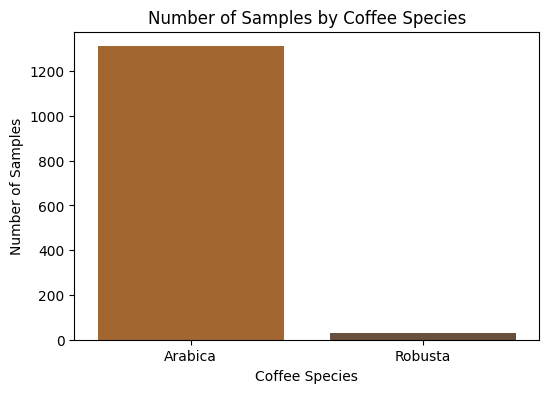

In [21]:
# Count samples by coffee species
coffee_count = df['species'].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=coffee_count.index, y=coffee_count.values, palette=['#b5651d','#6f4e37'])
plt.title('Number of Samples by Coffee Species')
plt.xlabel('Coffee Species')
plt.ylabel('Number of Samples')
plt.show()

The dataset includes a larger number of Arabica samples compared to Robusta, which reflects the broader representation of Arabica coffees in the CQI database.

# Sensory Attribute Correlations

Now, let’s explore the relationships between sensory attributes and the final quality score (Total Cup Points) for each coffee type.

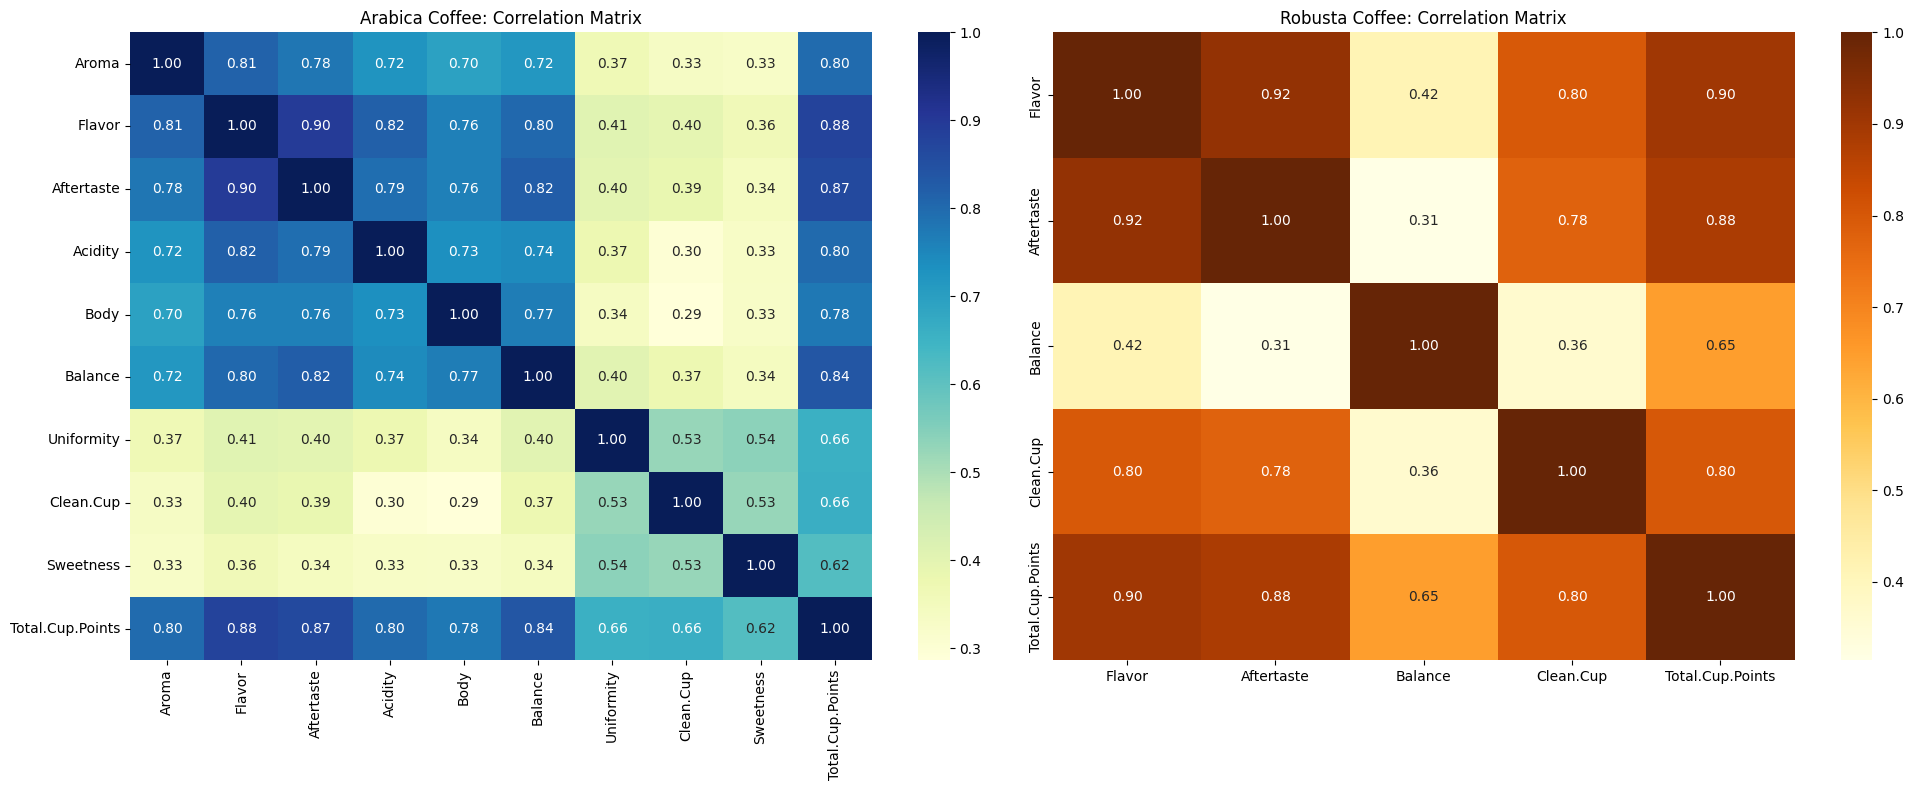

In [17]:
# Select relevant sensory attributes that are present in both dataframes
sensory_vars_arabica = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Total.Cup.Points']
sensory_vars_robusta = [col for col in sensory_vars_arabica if col in df_robusta.columns]

# Separate correlation matrices
arabica_corr = df_arabica[sensory_vars_arabica].corr()
robusta_corr = df_robusta[sensory_vars_robusta].corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(arabica_corr, annot=True, cmap='YlGnBu', fmt='.2f', ax=axes[0])
axes[0].set_title('Arabica Coffee: Correlation Matrix')

sns.heatmap(robusta_corr, annot=True, cmap='YlOrBr', fmt='.2f', ax=axes[1])
axes[1].set_title('Robusta Coffee: Correlation Matrix')

plt.tight_layout()
plt.show()

# Correlation Insights


From the correlation heatmaps, we can draw the following observations:

*   For Arabica coffees, the highest correlations with Total Cup Points are usually Aroma, Flavor, Aftertaste, and Balance.
These attributes tend to capture the complexity and harmony of high-quality Arabica beans.
*  For Robusta coffees, while flavor and aroma remain important, Body and Aftertaste often show a stronger correlation with overall quality.
This aligns with Robusta’s heavier and earthier sensory profile.

* In both species, Uniformity, Clean Cup, and Sweetness also correlate strongly because they penalize defects and reward consistency.

# Visualizing Attribute Trends

To visualize how specific sensory attributes influence quality, we can plot the average value of each attribute across quality levels.

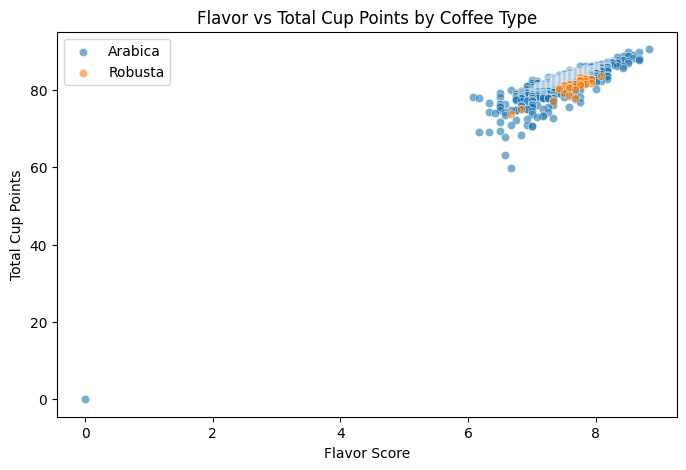

In [19]:
# Average sensory scores by quality level
arabica_quality = df_arabica.groupby('Total.Cup.Points')[['Aroma','Flavor','Body','Balance']].mean().reset_index()
robusta_quality = df_robusta.groupby('Total.Cup.Points')[['Flavor','Aftertaste','Balance']].mean().reset_index()

# Example: Flavor vs Quality
plt.figure(figsize=(8,5))
sns.scatterplot(x='Flavor', y='Total.Cup.Points', data=df_arabica, label='Arabica', alpha=0.6)
sns.scatterplot(x='Flavor', y='Total.Cup.Points', data=df_robusta, label='Robusta', alpha=0.6)
plt.title('Flavor vs Total Cup Points by Coffee Type')
plt.xlabel('Flavor Score')
plt.ylabel('Total Cup Points')
plt.legend()
plt.show()

* Arabica samples usually score higher on aroma, flavor, and balance, showing smoother and more complex sensory characteristics.

* Robusta samples tend to have higher body but lower overall cup scores, indicating stronger but less refined flavor profiles.

* These initial patterns will guide further analysis in later milestones, where regression or feature importance methods (like correlation ranking or linear modeling) can quantify which factors most determine coffee quality for each species.

